In [64]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [277]:
dataset = pd.read_csv('indian_liver_patient.csv')
headers = dataset.dtypes.index
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [278]:
dataset['Gender']=dataset.Gender.map(dict(Female=0,Male=1))

In [439]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
Age                           579 non-null int64
Gender                        579 non-null int64
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       579 non-null int64
dtypes: float64(5), int64(6)
memory usage: 74.3 KB


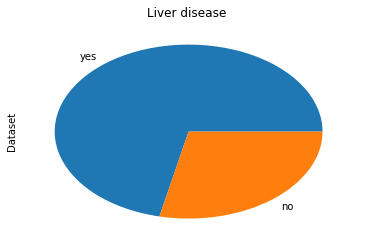

In [450]:
import matplotlib.pyplot as plt
labels='yes','no'
plot= pd.value_counts(dataset['Dataset']).sort_index()
plot.plot(kind = 'pie',labels=labels)
plt.title("Liver disease ")

plt.show()

In [456]:
import seaborn as sns
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
# Draw the heatmap using seaborn
sns.heatmap(dataset.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

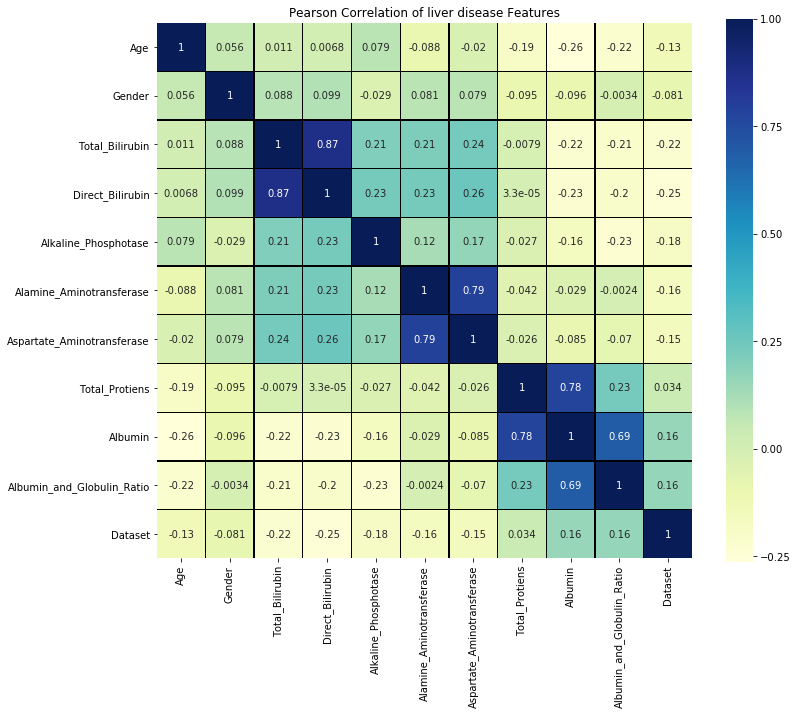

In [457]:
plt.show()

In [279]:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [280]:
dataset=dataset.dropna()

In [281]:
dataset.Albumin_and_Globulin_Ratio.isnull().values.any()

False

In [407]:
X, y = dataset.iloc[:,0:-1],dataset.iloc[:,-1]
X.tail()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50


In [434]:
# split data into train and test sets
seed =270
test_size = 0.09
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [435]:

model = XGBClassifier(objective ='reg:logistic', 
                      colsample_bytree =0.6,
                      learning_rate = 0.04,
                      gamma=1, 
                      max_depth = 1,
                      min_child_weight=1,
                      reg_alpha = 10,
                      n_estimators = 100,
                      sub_sample=1,
                       num_boost_round=10)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1, learning_rate=0.04, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_boost_round=10,
       objective='reg:logistic', random_state=0, reg_alpha=10,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       sub_sample=1, subsample=1)

In [436]:

print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1, learning_rate=0.04, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_boost_round=10,
       objective='reg:logistic', random_state=0, reg_alpha=10,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       sub_sample=1, subsample=1)


In [437]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [438]:

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.02%
